In [ ]:
#import all of the libraries needed
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow

In [ ]:
#in this part i define a function for plotting an image to avoide duplicate code
def show_img(img_path):
  img1 = mpimg.imread(img_path)
  plt.imshow(img1)
  plt.axis('off')
  plt.show()



#Section A

In [ ]:
#define a mathod that applies sobel filter on an input image for edge detection
def Sobel(image , title):
  sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
  #compute edge strength
  edge_strength = np.sqrt(sobel_x**2 + sobel_y**2)
  #normalize it
  edge_strength = cv2.normalize(edge_strength, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
  #save the image
  cv2.imwrite(str(title) + '_edges_soble.jpg', edge_strength)

In [ ]:
img_1 = cv2.imread('/content/1.2.jpg', cv2.IMREAD_GRAYSCALE)
img_2 = cv2.imread('/content/1.3.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
Sobel(img_1 , 'building')

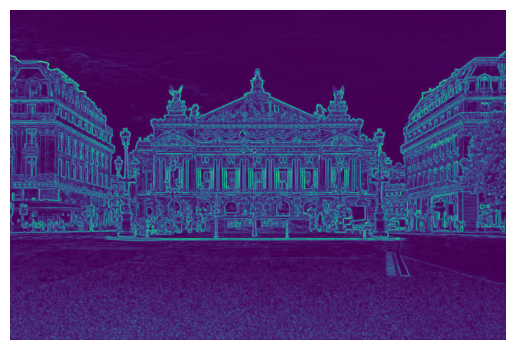

In [ ]:
show_img("/content/building_edges_soble.jpg")

In [ ]:
Sobel(img_2, 'river')

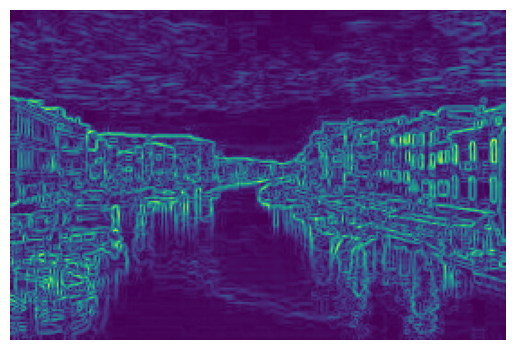

In [ ]:
show_img('/content/river_edges_soble.jpg')

In [ ]:
#In this section we should use some unsharp masking for the first pic I'm using Laplacian sharpening filter and for the
#second one I'm using high-boost filter
img_3 = cv2.imread('/content/1.4.jpg', cv2.IMREAD_GRAYSCALE)
img_4 = cv2.imread('/content/1.5.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
#first we define the laplacian kernel
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -5, 1],
                             [0, 1, 0]])

In [ ]:
sharpened_img_3 = cv2.filter2D(img_3, -1, laplacian_kernel)

In [ ]:
sharpened_image = cv2.normalize(sharpened_img_3, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

In [ ]:
cv2.imwrite('sharpened_output.jpg', sharpened_image)

True

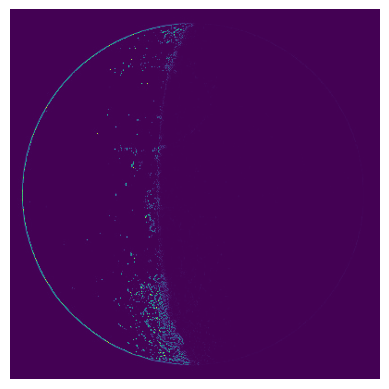

In [ ]:
show_img('/content/sharpened_output.jpg')

In [ ]:
laplac = cv2.imread('/content/sharpened_output.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
mask = img_3-laplac

In [ ]:
sharp_img_3 = img_3 + laplac

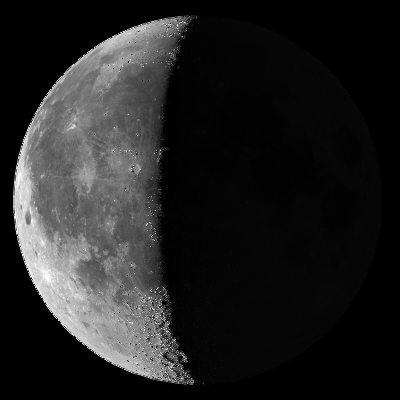

In [ ]:
cv2_imshow(sharp_img_3)

In [ ]:
#let's set A as 2.7
hb_kernel = np.array([[0, -1, 0],
                             [-1, 20, -1],
                             [0, -1, 0]])

In [ ]:
hb_img_4 = cv2.filter2D(img_4, -1, laplacian_kernel)

In [ ]:
sharpened_image = cv2.normalize(hb_img_4, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

In [ ]:
cv2.imwrite('hb_output.jpg', sharpened_image)

True

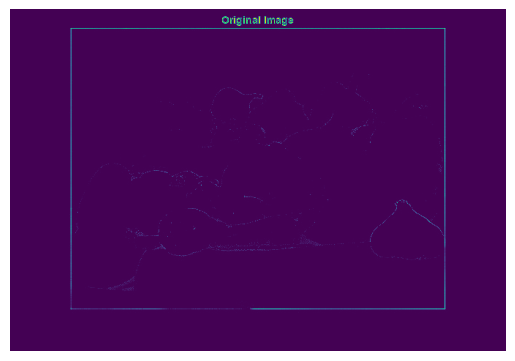

In [ ]:
show_img('/content/hb_output.jpg')

In [ ]:
hb = cv2.imread('/content/hb_output.jpg',cv2.IMREAD_GRAYSCALE)

In [ ]:
mask = img_4 - hb

In [ ]:
sharp_img_4 = 1.7 * img_4 + mask

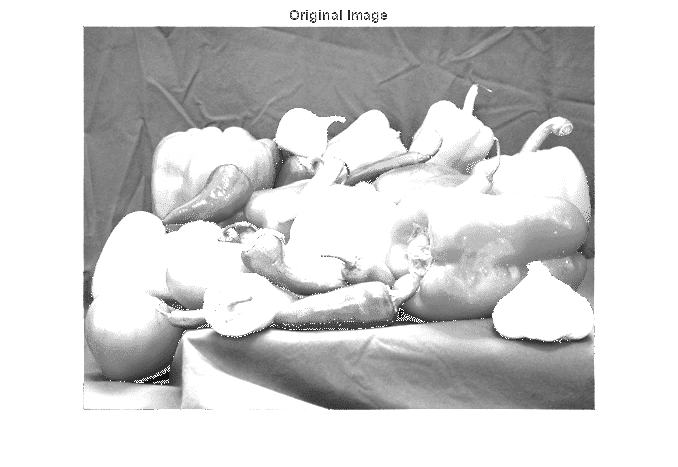

In [ ]:
cv2_imshow(sharp_img_4)

Yes, there exists some methods for automating the double thresholing stage of the canny edge detection process. I apply two of the methods in the following section and then compare their outputs.

1) The first method is using Otsu's thresholding, which computes thresholds automatically and effectively seperates the background from foreground.

In [ ]:
chosen_img = cv2.imread('/content/Dandelion.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
otsu_thresh_val, _ = cv2.threshold(chosen_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [ ]:
high_thresh_val = otsu_thresh_val
lower_thresh_val = otsu_thresh_val * 0.5

In [ ]:
canny_result = cv2.Canny(chosen_img, lower_thresh_val, high_thresh_val)

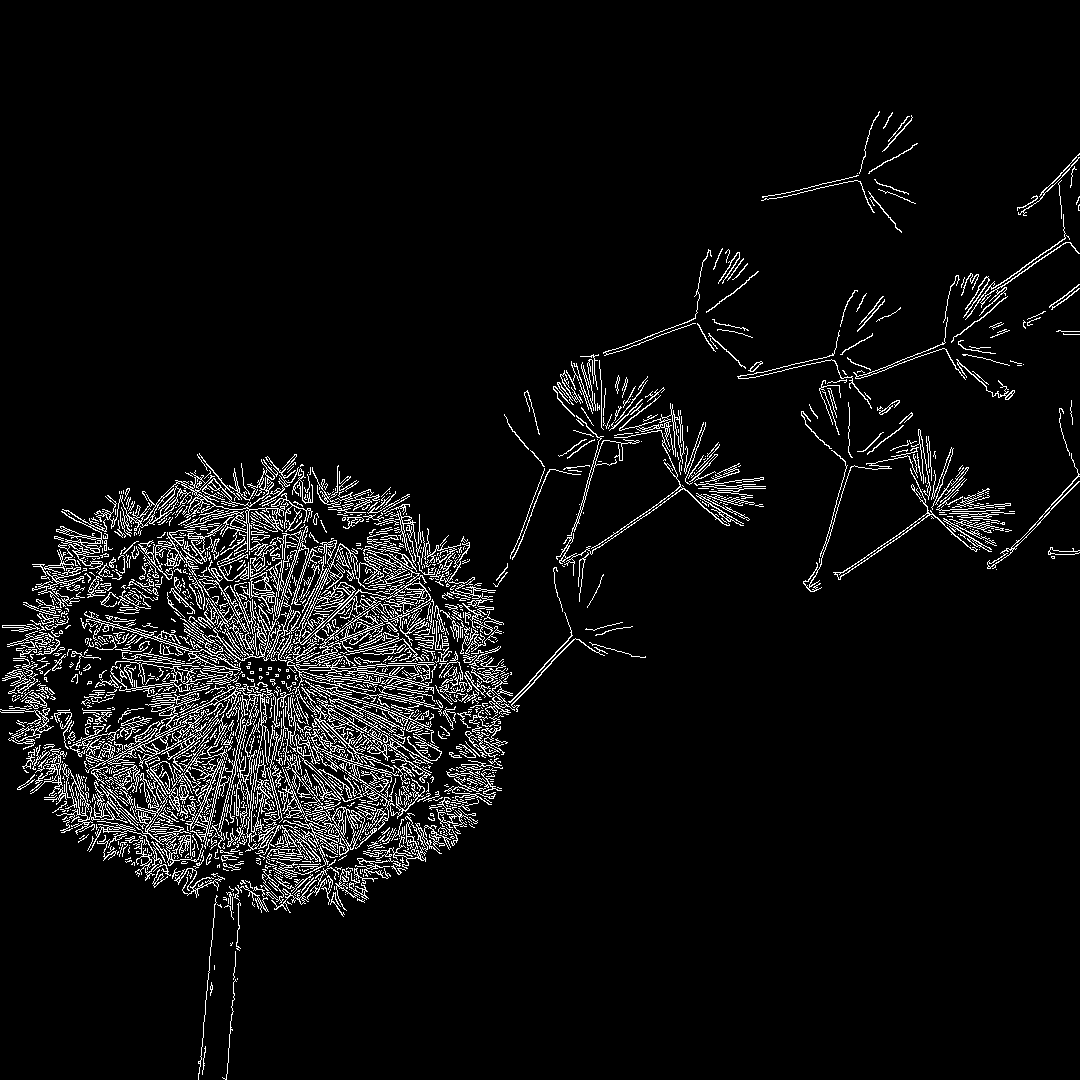

In [ ]:
cv2_imshow(canny_result)

2) The second method is adaptive thresholding. This method computes local thresholds based on a small region of the image. It's useful for pics taken in an uneven lighting condition.

In [ ]:
chosen_img_2 = cv2.imread('/content/1049d34a03934922654cd9840955b39f.jpg',cv2.IMREAD_GRAYSCALE)

In [ ]:
block_size = 13  # Adjust this based on your image characteristics
constant = 2     # Adjust this as needed
binary_img = cv2.adaptiveThreshold(chosen_img_2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant)

# Apply Canny edge detection
high_thresh_val = 255
lower_thresh_val = 0.5 * high_thresh_val
canny_result = cv2.Canny(binary_img, lower_thresh_val, high_thresh_val)

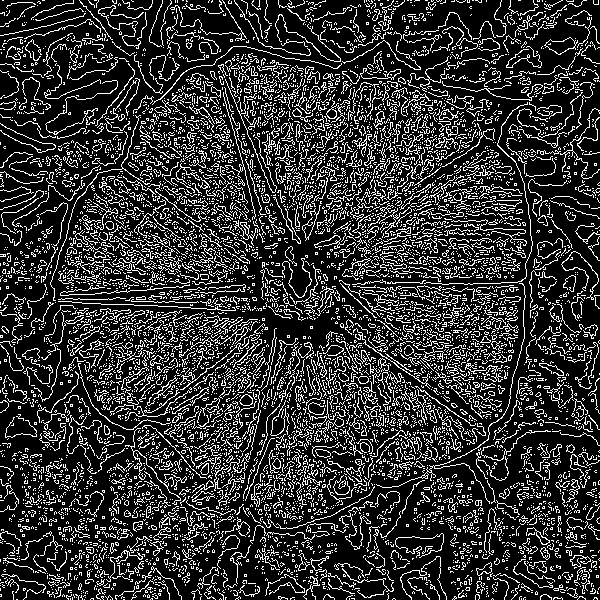

In [ ]:
cv2_imshow(canny_result)

#Section B

In [ ]:
img1 = cv2.imread('/content/input1.jpg',cv2.IMREAD_GRAYSCALE)

In [ ]:
#first step : applying gaussian filter
img1 = cv2.GaussianBlur(img1, (5, 5), 0)

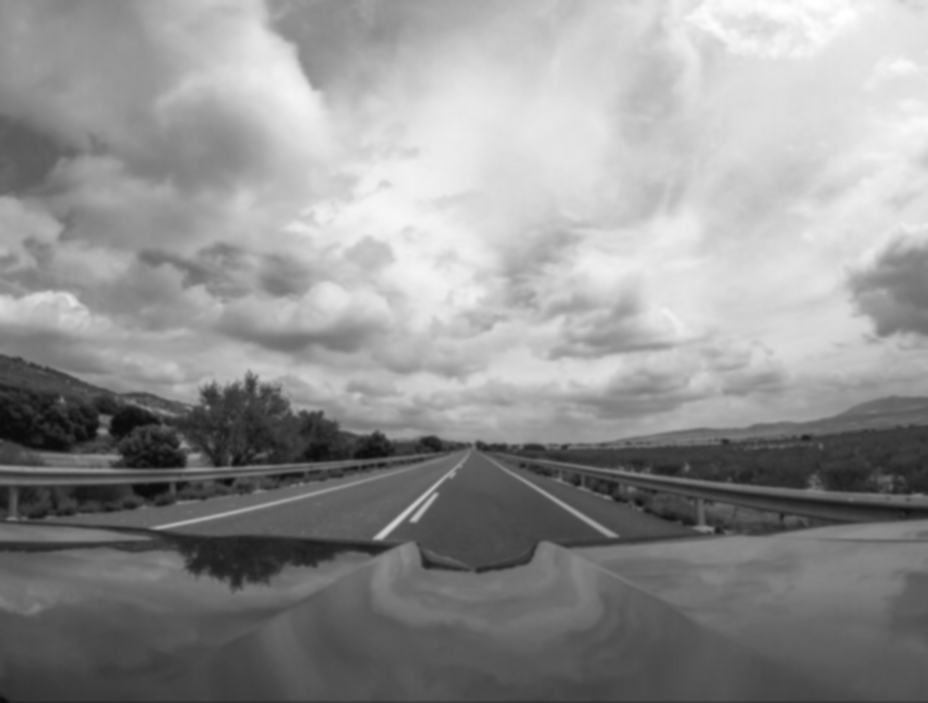

In [ ]:
cv2_imshow(img1)

In [ ]:
dst = cv2.Laplacian(img1, cv2.CV_16S, ksize=3)

In [ ]:
abs_dst = cv2.convertScaleAbs(dst)

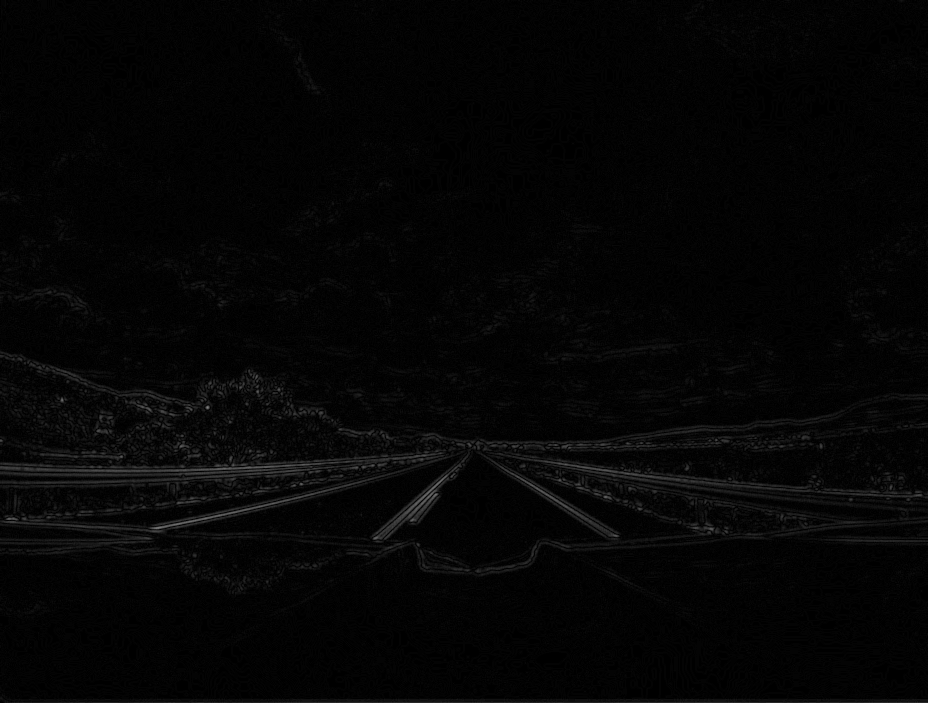

In [ ]:
cv2_imshow(abs_dst)

In [ ]:
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

In [ ]:
sharpened_img1 = cv2.filter2D(img1, -1, laplacian_kernel)
sharpened_image = cv2.normalize(sharpened_img1, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

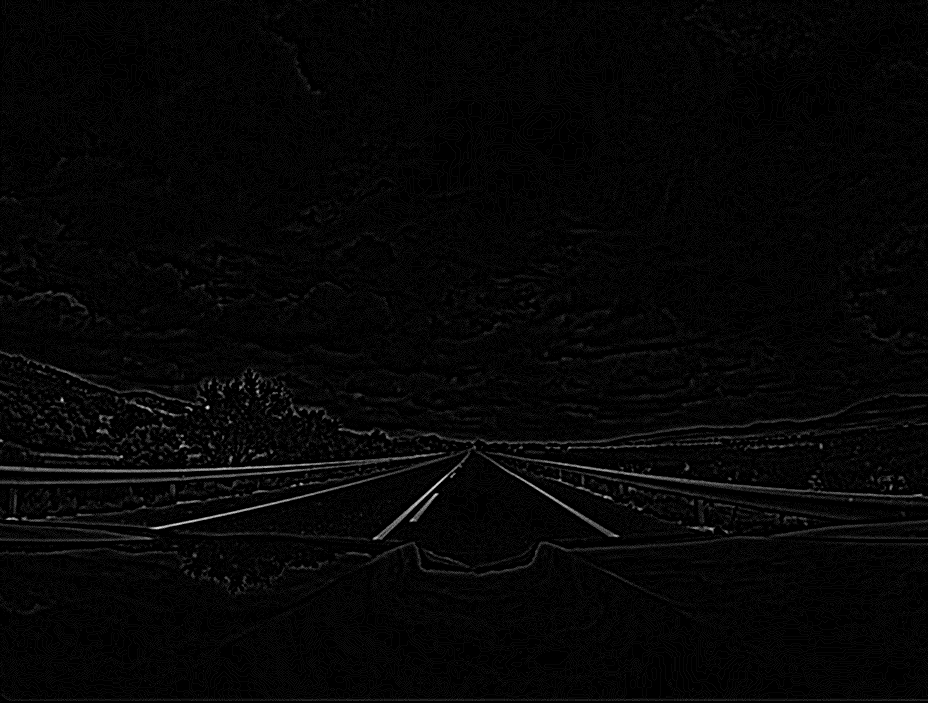

In [ ]:
cv2_imshow(sharpened_image)

In [ ]:
laplacian_kernel = np.array([[-1, -1, -1],
                             [-1, 8, -1],
                             [-1, -1, -1]])

In [ ]:
sharpened_img1 = cv2.filter2D(img1, -1, laplacian_kernel)
sharpened_image = cv2.normalize(sharpened_img1, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

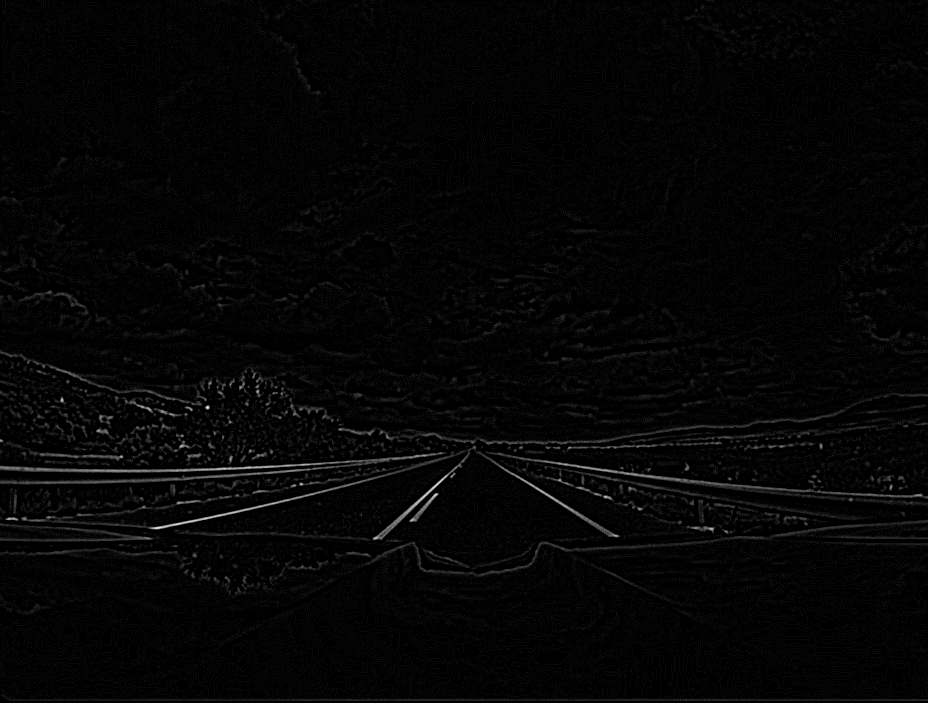

In [ ]:
cv2_imshow(sharpened_image)